In [67]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pickle

In [2]:
data=pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
data.shape

(3276, 10)

In [5]:
data=data.dropna()

In [6]:
data.shape

(2011, 10)

In [7]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


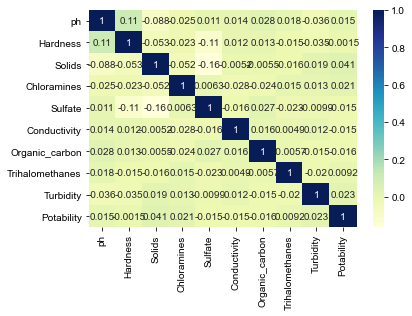

In [8]:
sn.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sn.set(rc={'figure.figsize':(80,8.27)})
plt.show()

In [9]:
list(data.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [10]:
x=data.drop(['Potability'],axis=1)
y=data['Potability']

In [11]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [12]:
y.head()

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
#data slipt into 80% and 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [14]:
ls=list(x_test.shape)
ls

[403, 9]

In [15]:

from sklearn.linear_model import LogisticRegression
Logmodel=LogisticRegression()
Logmodel.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=Logmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[246,   0],
       [157,   0]], dtype=int64)

In [16]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 61 %


In [17]:

from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=classifier_nb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[221,  25],
       [118,  39]], dtype=int64)

In [18]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 65 %


In [19]:

## Kernel="sigmoid"

from sklearn.svm import SVC
classifier_svm_sigmoid = SVC(kernel='sigmoid')
classifier_svm_sigmoid.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=classifier_svm_sigmoid.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[153,  93],
       [100,  57]], dtype=int64)

In [20]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 52 %


In [21]:

## Kernel="linear"

from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel='rbf')
classifier_svm_rbf.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=classifier_svm_rbf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[246,   0],
       [157,   0]], dtype=int64)

In [22]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 61 %


In [23]:

from sklearn.svm import SVC
classifier_svm_poly = SVC(kernel='poly')
classifier_svm_poly.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=classifier_svm_poly.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[246,   0],
       [157,   0]], dtype=int64)

In [24]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 61 %


In [25]:

from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='entropy')
classifier_dt.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=classifier_dt.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[169,  77],
       [ 71,  86]], dtype=int64)

In [26]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 63 %


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[173,  73],
       [ 79,  78]], dtype=int64)

In [28]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 62 %


In [29]:
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred=classifier_nb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[221,  25],
       [118,  39]], dtype=int64)

In [30]:
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 65 %


In [65]:
y_pred=classifier_nb.predict([[0,50,10,8,356,363,18,100,4]])
y_pred

array([0], dtype=int64)

In [66]:
if int(y_pred)==1:
    print('Potable')
else:
    print('Not Potable')

Not Potable


In [68]:
pickle.dump(classifier_nb, open('water.pkl', 'wb'))